# Business case

John the CEO of the winery located in Vilafranca del Penedés wine company has been very happy with the exploratory analysis we did a few days ago. Good work!

    John gave us two NEW datasets containing information regarding two qualities of wines from his winery. He wants to dive into this data and try to stablish a standard and robust model for both varieties of wines. He normally uses an external control panel in order to stablish the mentioned label (quality of wine) but it is really expensive. He wants to know whether he could save some money by building a classification model to predict the quality of his wines in function of some other features.


## Key information of the variables



Datasets: `Ex5.1.winequality-1.csv` and `Ex5.1. winequality-2.csv`. 

> Remember that you should merge both of them and create a new variable (quality) which will be your target variables

**Help John because he is our super-star client !**

In [1]:
# Steps to follow:
# 1. Import both datsets and have a look at it. 
# 2. Merge both datasets and create a new variable named:
# [Type], labelling into 0 and 1, respectively for Quality1 and Quality2. Check the total number of both type of wines to see if
# your dataset is balanced!
# 3. Identify the target variable (remember that we are going to classify, so we need GROUPS or labels)
# 4. EDA and Data Cleaning: check missing values, possible Outliers, type of variables (categorical, numerical)...
# 5. Feature engineering: data transformations (scaling, log...) and encoding cat variables
# 6. Think about which models you want to test (at least 2. For outstanding all ;))
# 7. Split into train / test
# 8. Start with baseline model. Evaluate performance
# 9. Tune the baseline model
# 10. Test the other algorithms that you considered on step 6
# 11. Tune and optimize models
# 12. Extract conclusions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [3]:
df_1 = pd.read_csv('../../datasets/Students_turn/Ex5.1.winequality-1.csv', delimiter = ';', decimal = ',')
df_1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.02              0.26         0.21            16.2      0.074   
1           6.02              0.24         0.44             3.5      0.029   
2           7.02              0.59         0.38             1.6      0.066   
3           7.02              0.32         0.32            11.0      0.038   
4           6.02              0.39         0.40             4.6      0.022   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 41.0                 197.0   0.9980  3.02       0.50   
1                  5.0                 109.0   0.9913  3.53       0.43   
2                 34.0                 182.0   0.9968  3.23       0.38   
3                 16.0                  66.0   0.9937  3.24       0.40   
4                  5.0                  19.0   0.9915  3.31       0.37   

   alcohol  color_hue  Age  
0      9.8          3   10  
1     11.7          3   12  
2      8.5          3   14  
3     11.5          3   13  
4     12.6          3   11

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  color_hue             4898 non-null   int64  
 12  Age                   4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [5]:
df_1['Quality'] = 0

In [6]:
df_1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.02              0.26         0.21            16.2      0.074   
1           6.02              0.24         0.44             3.5      0.029   
2           7.02              0.59         0.38             1.6      0.066   
3           7.02              0.32         0.32            11.0      0.038   
4           6.02              0.39         0.40             4.6      0.022   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 41.0                 197.0   0.9980  3.02       0.50   
1                  5.0                 109.0   0.9913  3.53       0.43   
2                 34.0                 182.0   0.9968  3.23       0.38   
3                 16.0                  66.0   0.9937  3.24       0.40   
4                  5.0                  19.0   0.9915  3.31       0.37   

   alcohol  color_hue  Age  Quality  
0      9.8          3   10        0  
1     11.7          3   12        0  
2      8.5          3   14        0  
3     11.5          3   13        0  
4     12.6          3   11        0

In [7]:
df_2 = pd.read_csv('../../datasets/Students_turn/Ex5.1.winequality-2.csv', decimal = ',')
df_2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      10.372945              0.70         0.00             1.9       76.0   
1       9.328461              0.88         0.00             2.6       98.0   
2       9.594980              0.76         0.04             2.3       92.0   
3      10.872380              0.28         0.56             1.9       75.0   
4      10.029248              0.70         0.00             1.9       76.0   

   free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
0                 11.0                  34.0    0.9978  3.51       0.56   
1                 25.0                  67.0    0.9968  3.20       0.68   
2                 15.0                  54.0  997.0000  3.26       0.65   
3                 17.0                  60.0  998.0000  3.16       0.58   
4                 11.0                  34.0    0.9978  3.51       0.56   

   alcohol  color_hue   Age  
0      9.4        5.0  15.0  
1      9.8        5.0  13.0  
2      9.8        5.0  12.0  
3      9.8        6.0  18.0  
4      9.4        5.0  17.0

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   fixed acidity         1599 non-null     float64
 1   volatile acidity      1048575 non-null  float64
 2   citric acid           1599 non-null     float64
 3   residual sugar        1599 non-null     float64
 4   chlorides             1599 non-null     float64
 5   free sulfur dioxide   1599 non-null     float64
 6   total sulfur dioxide  1599 non-null     float64
 7   density               1599 non-null     float64
 8   pH                    1599 non-null     float64
 9   sulphates             1599 non-null     float64
 10  alcohol               1599 non-null     float64
 11  color_hue             1599 non-null     float64
 12  Age                   1599 non-null     float64
dtypes: float64(13)
memory usage: 104.0 MB


In [9]:
df_2['Quality'] = 1

In [10]:
df_1.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
color_hue               0
Age                     0
Quality                 0
dtype: int64

In [11]:
df_1.duplicated().sum()

56

In [12]:
df_1.drop_duplicates(inplace = True)

In [13]:
df_2.isna().sum()

fixed acidity           1046976
volatile acidity              0
citric acid             1046976
residual sugar          1046976
chlorides               1046976
free sulfur dioxide     1046976
total sulfur dioxide    1046976
density                 1046976
pH                      1046976
sulphates               1046976
alcohol                 1046976
color_hue               1046976
Age                     1046976
Quality                       0
dtype: int64

In [14]:
df_2.dropna(axis = 0, inplace = True)

In [15]:
df_2.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
color_hue               0
Age                     0
Quality                 0
dtype: int64

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  color_hue             1599 non-null   float64
 12  Age                   1599 non-null   float64
 13  Quality               1599 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 187.4 KB


In [17]:
df_2.duplicated().sum()

0

In [18]:
wine = pd.concat([df_1, df_2], ignore_index=True)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6441 non-null   float64
 1   volatile acidity      6441 non-null   float64
 2   citric acid           6441 non-null   float64
 3   residual sugar        6441 non-null   float64
 4   chlorides             6441 non-null   float64
 5   free sulfur dioxide   6441 non-null   float64
 6   total sulfur dioxide  6441 non-null   float64
 7   density               6441 non-null   float64
 8   pH                    6441 non-null   float64
 9   sulphates             6441 non-null   float64
 10  alcohol               6441 non-null   float64
 11  color_hue             6441 non-null   float64
 12  Age                   6441 non-null   float64
 13  Quality               6441 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 704.6 KB


In [19]:
wine.shape

(6441, 14)

In [20]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.02              0.26         0.21            16.2      0.074   
1           6.02              0.24         0.44             3.5      0.029   
2           7.02              0.59         0.38             1.6      0.066   
3           7.02              0.32         0.32            11.0      0.038   
4           6.02              0.39         0.40             4.6      0.022   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 41.0                 197.0   0.9980  3.02       0.50   
1                  5.0                 109.0   0.9913  3.53       0.43   
2                 34.0                 182.0   0.9968  3.23       0.38   
3                 16.0                  66.0   0.9937  3.24       0.40   
4                  5.0                  19.0   0.9915  3.31       0.37   

   alcohol  color_hue   Age  Quality  
0      9.8        3.0  10.0        0  
1     11.7        3.0  12.0        0  
2      8.5        3.0  14.0        0  
3     11.5        3.0  13.0        0  
4     12.6        3.0  11.0        0

In [21]:
wine.Quality.value_counts()

0    4842
1    1599
Name: Quality, dtype: int64

In [116]:
wine.Quality.value_counts(normalize = True)

0    0.763212
1    0.236788
Name: Quality, dtype: float64

In [22]:
#imbalanced dataset

In [23]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
color_hue               0
Age                     0
Quality                 0
dtype: int64

In [24]:
wine.duplicated().sum()

0

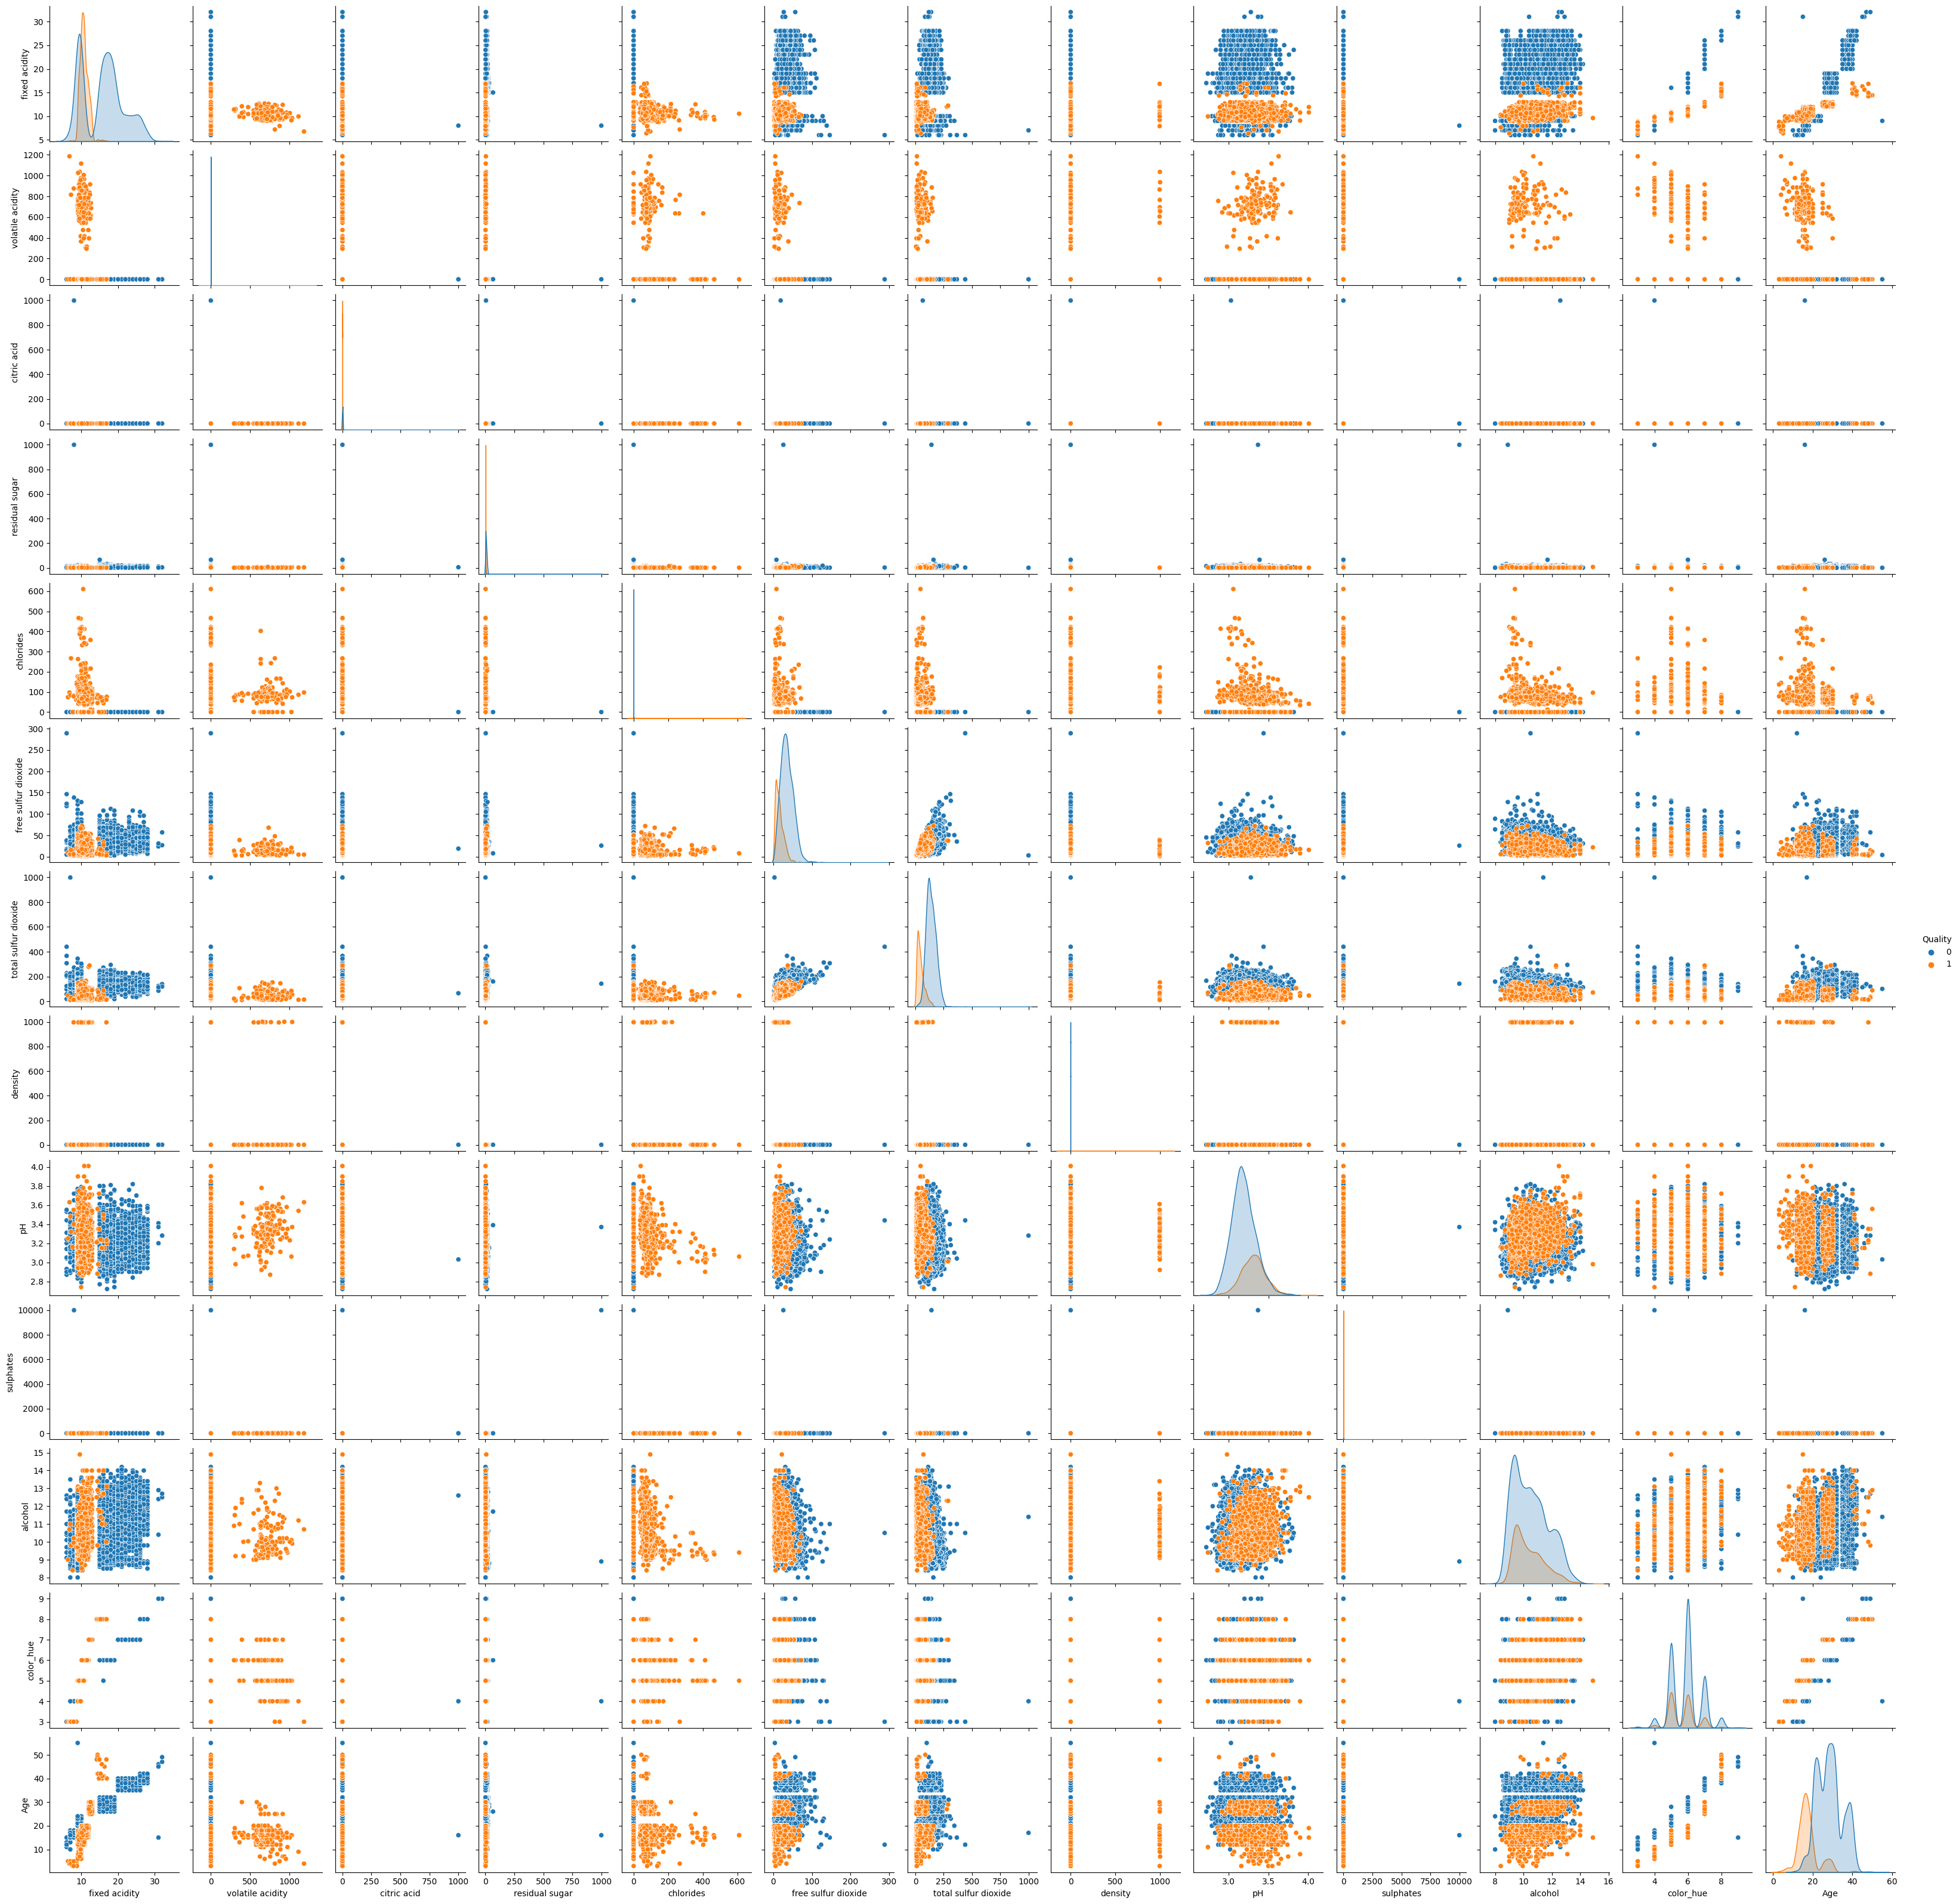

In [25]:
sns.pairplot(wine, hue = 'Quality')

In [26]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color_hue', 'Age', 'Quality'],
      dtype='object')

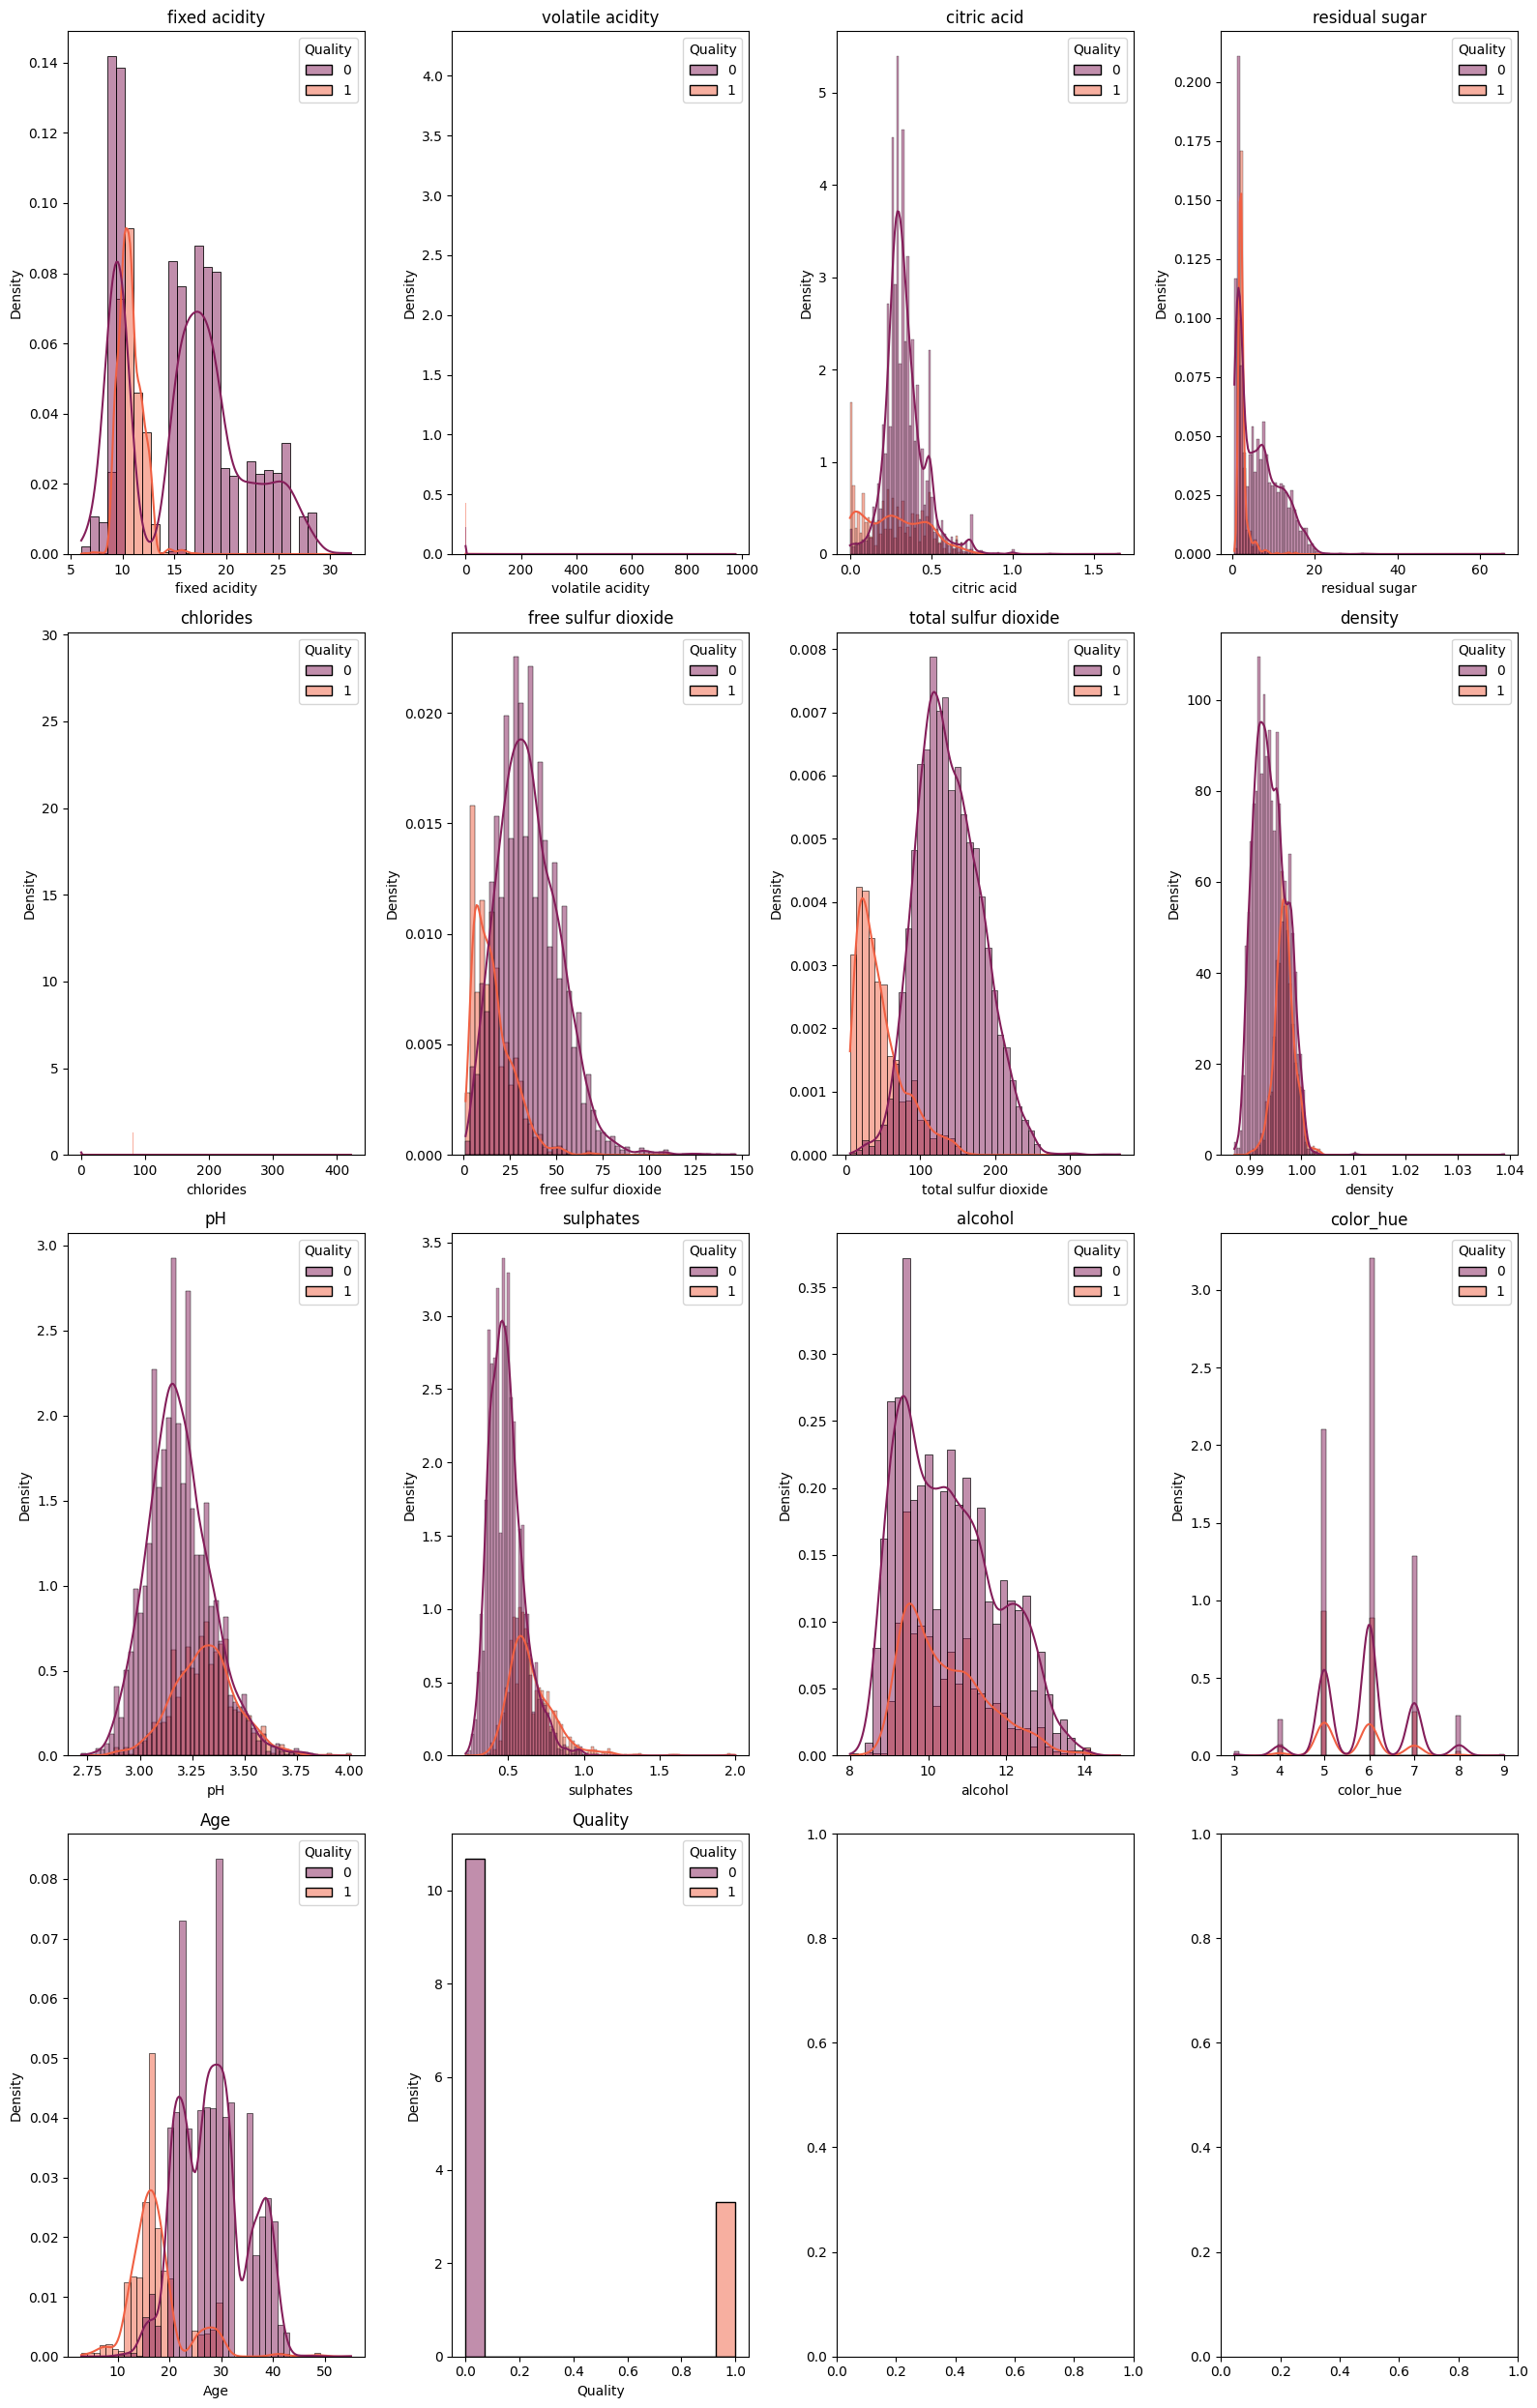

In [100]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,25))

# Create the boxplot with Seaborn, hue param is very useful for classification
for c, ax in zip(num_cols, axes.flatten()): #zip is used to look at 2 lists at the same time, flatten makes it list
    sns.histplot(data=wine,x=c, hue='Quality', ax=ax, palette='rocket', kde=True, stat='density') 
    ax.set_title(c)

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
num_cols = wine.columns
print(len(num_cols))

14


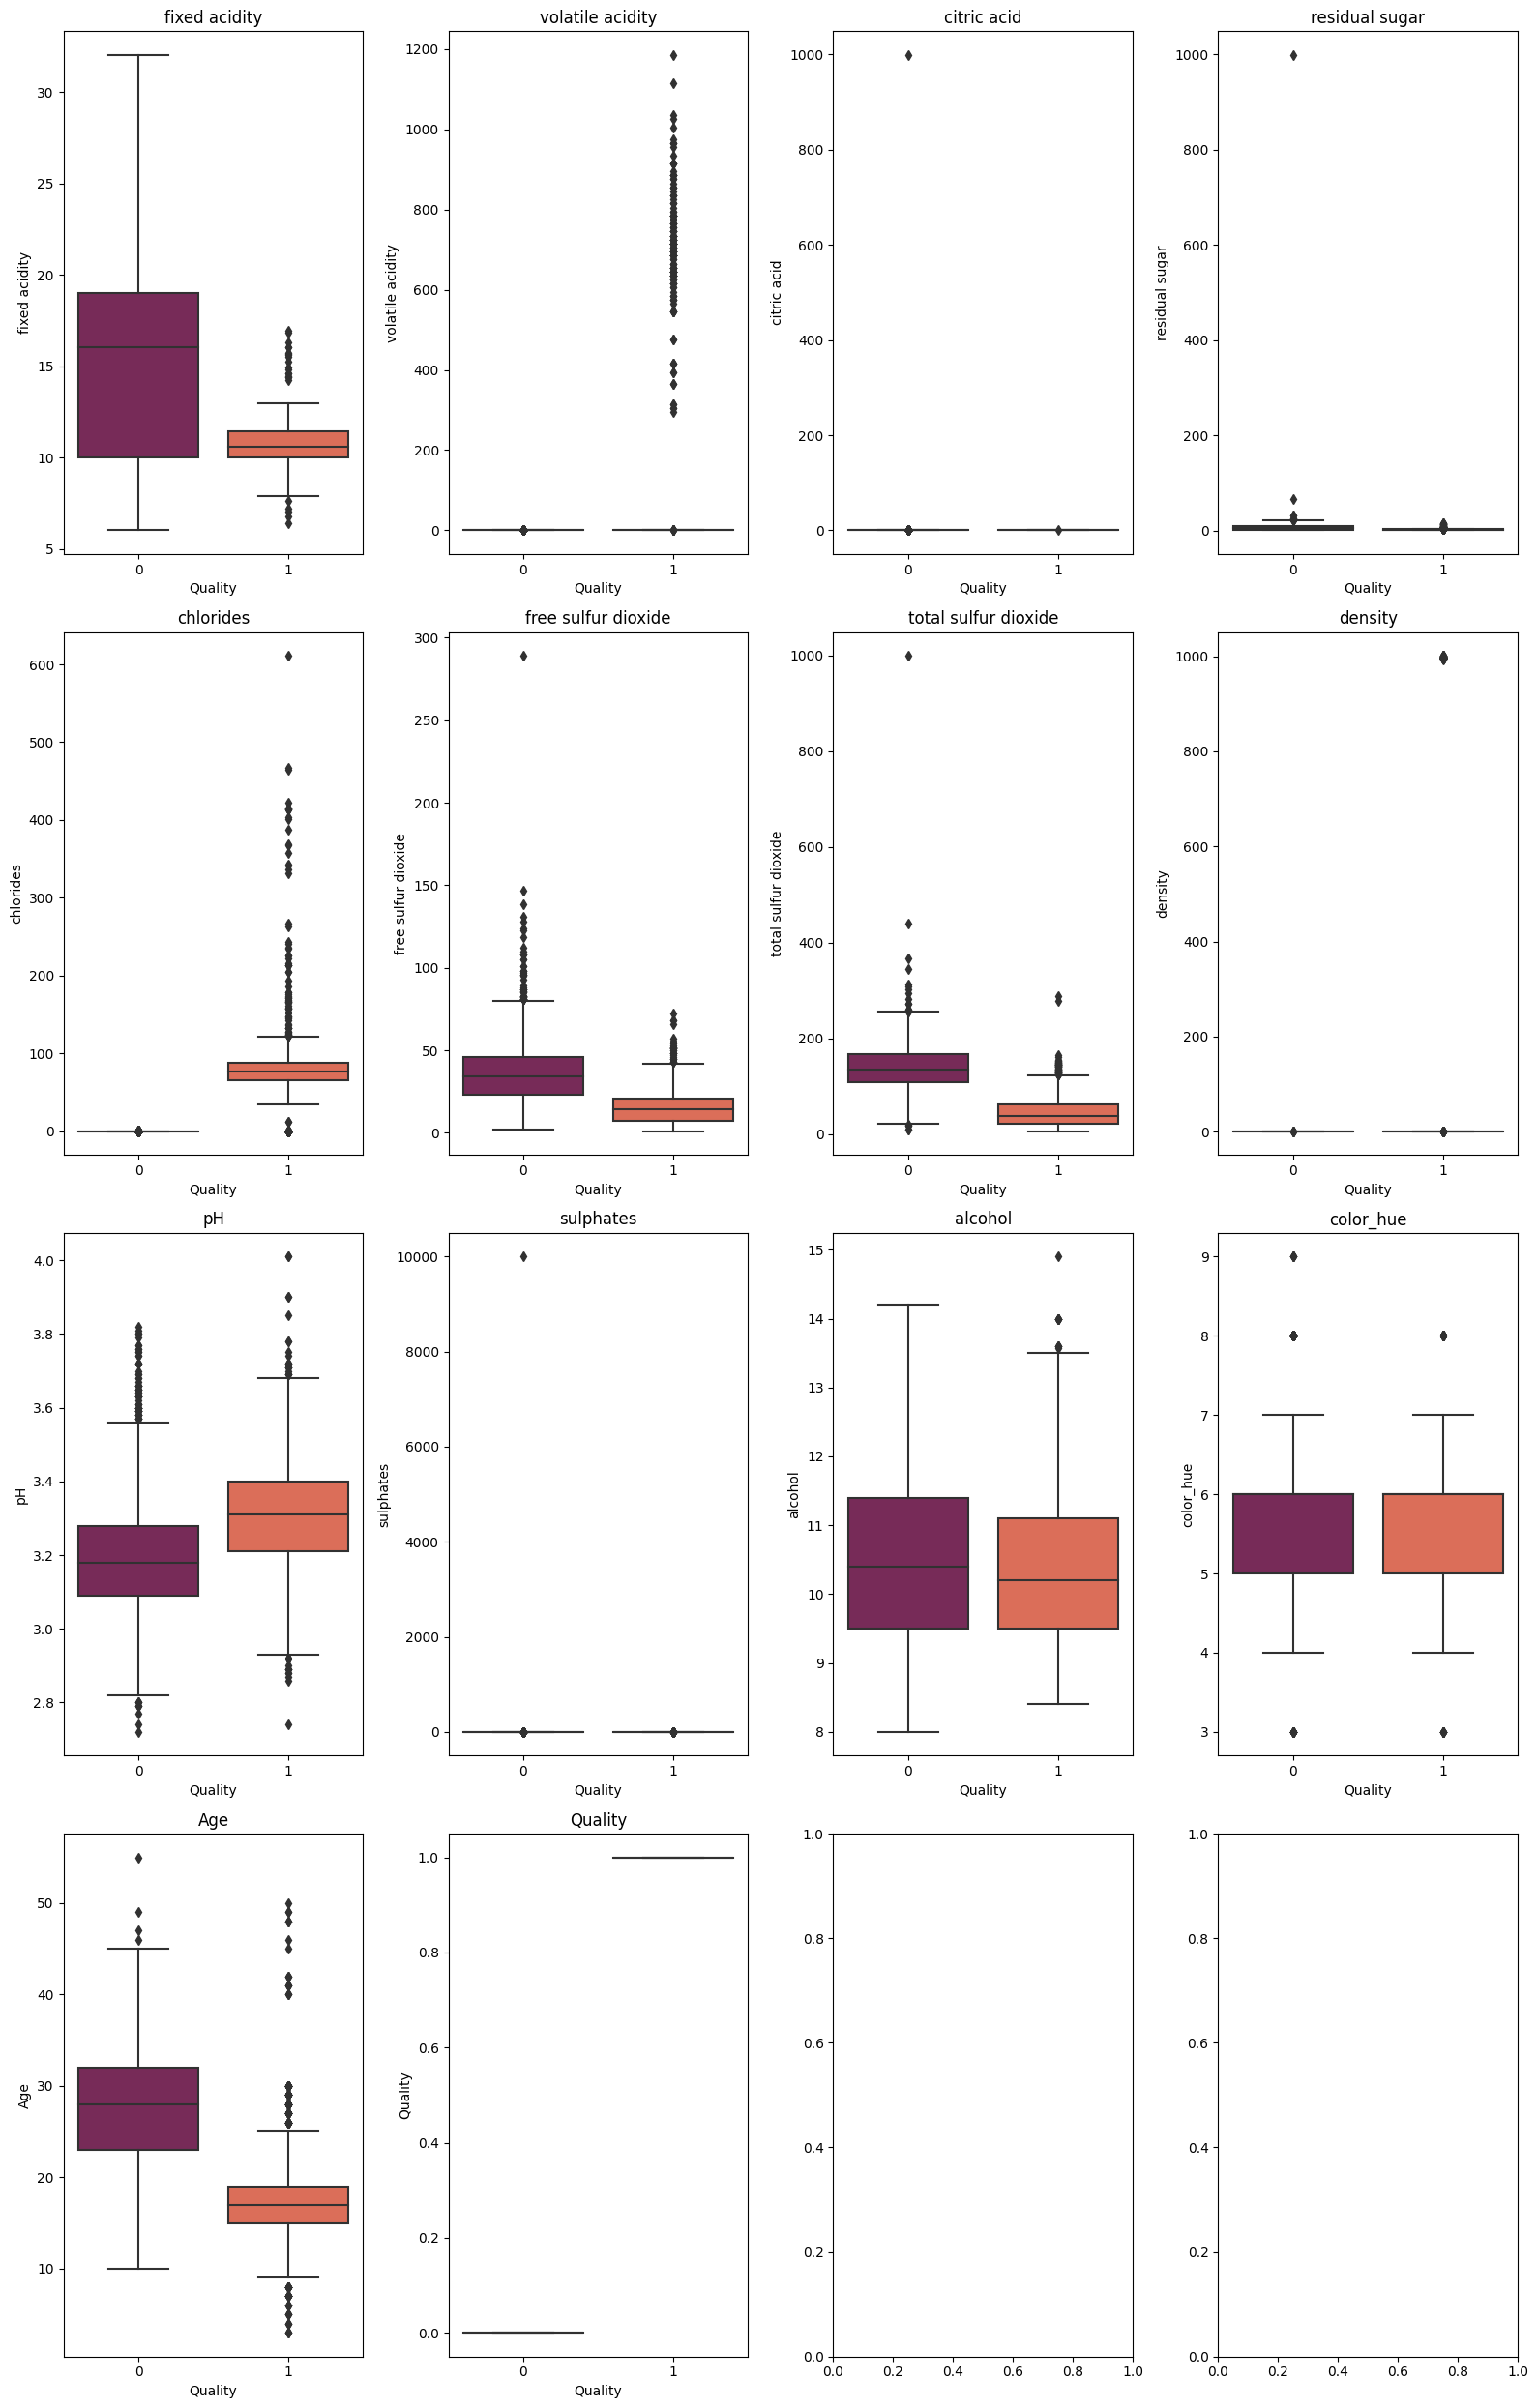

In [29]:
# Create the figure and two subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,25))

# Create the boxplot with Seaborn
for c, ax in zip(num_cols, axes.flatten()):
    sns.boxplot(data=wine,y=c, x='Quality', ax=ax, palette='rocket') 
    ax.set_title(c)

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
import sys
sys.path.insert(0, '/Users/lina/Documents/DA_Course/_module4_')

from functions_EDA import *

<AxesSubplot:ylabel='sulphates'>

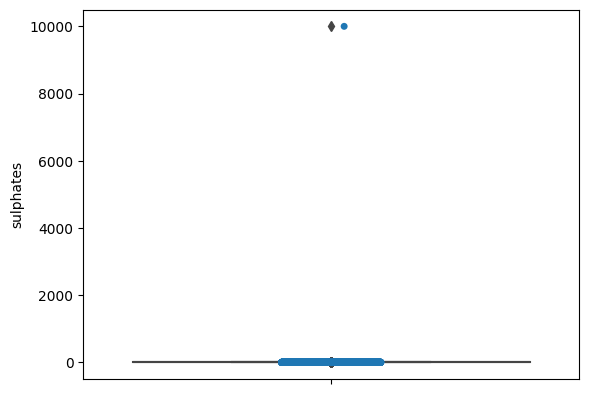

In [31]:
sns.boxplot(data=wine, y = 'sulphates', palette='rocket') 
sns.stripplot(y='sulphates', data=wine)

<AxesSubplot:ylabel='chlorides'>

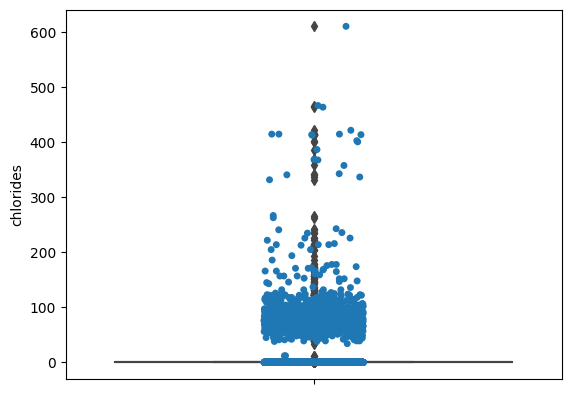

In [32]:
sns.boxplot(data=wine, y = 'chlorides', palette='rocket') 
sns.stripplot(y='chlorides', data=wine)

In [33]:
wine = wine.loc[(wine.sulphates < 1000) & (wine['citric acid']< 200) & (wine['residual sugar']< 200) & (wine['chlorides']< 450)& (wine['free sulfur dioxide']< 250) & (wine['total sulfur dioxide']< 600) & (wine['density']< 200)]

In [34]:
wine['sulphates'].describe().T

count    6343.000000
mean        0.529379
std         0.147062
min         0.220000
25%         0.430000
50%         0.500000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

In [35]:
wine.describe().T

count        mean         std      min       25%  \
fixed acidity         6343.0   14.699815    5.318916  6.02000  10.02000   
volatile acidity      6343.0   19.097587  115.987814  0.08000   0.23000   
citric acid           6343.0    0.318643    0.144273  0.00000   0.25000   
residual sugar        6343.0    5.453626    4.755889  0.60000   1.80000   
chlorides             6343.0   18.150062   40.181055  0.00900   0.03800   
free sulfur dioxide   6343.0   30.651979   17.446937  1.00000  17.00000   
total sulfur dioxide  6343.0  116.337143   56.073147  6.00000  80.00000   
density               6343.0    0.994649    0.002996  0.98711   0.99228   
pH                    6343.0    3.217846    0.161013  2.72000   3.11000   
sulphates             6343.0    0.529379    0.147062  0.22000   0.43000   
alcohol               6343.0   10.500793    1.194260  8.00000   9.50000   
color_hue             6343.0    5.826108    0.873341  3.00000   5.00000   
Age                   6343.0   25.833044    7.743037  3.00000  20.00000   
Quality               6343.0    0.237269    0.425442  0.00000   0.00000   

                           50%       75%         max  
fixed acidity          15.0200   18.0200    32.02000  
volatile acidity        0.2900    0.4000  1185.00000  
citric acid             0.3100    0.3900     1.66000  
residual sugar          3.0000    8.1000    65.80000  
chlorides               0.0470    0.0800   422.00000  
free sulfur dioxide    29.0000   41.0000   146.50000  
total sulfur dioxide  119.0000  156.0000   366.50000  
density                 0.9948    0.9969     1.03898  
pH                      3.2100    3.3200     4.01000  
sulphates               0.5000    0.6000     2.00000  
alcohol                10.3000   11.3000    14.90000  
color_hue               6.0000    6.0000     9.00000  
Age                    26.0000   31.0000    55.00000  
Quality                 0.0000    0.0000     1.00000

<AxesSubplot:ylabel='volatile acidity'>

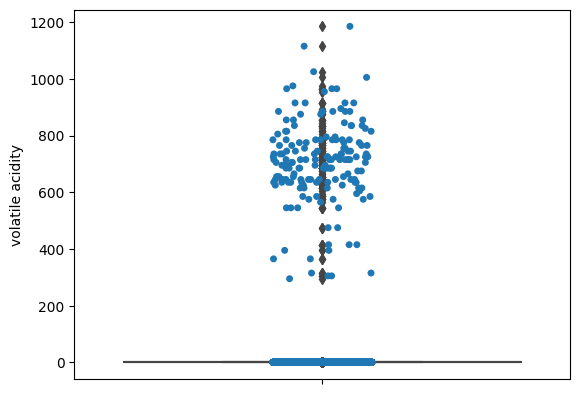

In [36]:
sns.boxplot(data=wine, y = 'volatile acidity', palette='rocket') 
sns.stripplot(y='volatile acidity', data=wine)

In [38]:
wine = wine.loc[wine['volatile acidity'] <= 1000]

In [42]:
wine.shape

(6339, 14)

In [46]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.130629     0.085915   
volatile acidity          -0.130629          1.000000    -0.170554   
citric acid                0.085915         -0.170554     1.000000   
residual sugar             0.043532         -0.097265     0.146825   
chlorides                 -0.339122          0.260750    -0.110037   
free sulfur dioxide        0.194560         -0.150922     0.139854   
total sulfur dioxide       0.170834         -0.205256     0.203225   
density                   -0.416549          0.120713     0.095156   
pH                        -0.054710          0.108708    -0.326371   
sulphates                 -0.153565          0.104924     0.045161   
alcohol                    0.397780         -0.045229    -0.016657   
color_hue                  0.848722         -0.092849     0.079546   
Age                        0.874374         -0.209042     0.158219   
Quality                   -0.412876          0.288641    -0.197026   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.043532  -0.339122             0.194560   
volatile acidity           -0.097265   0.260750            -0.150922   
citric acid                 0.146825  -0.110037             0.139854   
residual sugar              1.000000  -0.270285             0.406527   
chlorides                  -0.270285   1.000000            -0.386210   
free sulfur dioxide         0.406527  -0.386210             1.000000   
total sulfur dioxide        0.494075  -0.566288             0.718516   
density                     0.562152   0.342370             0.034525   
pH                         -0.266663   0.213021            -0.147654   
sulphates                  -0.182496   0.450676            -0.190473   
alcohol                    -0.361783  -0.070830            -0.185180   
color_hue                  -0.039771  -0.109018             0.059490   
Age                         0.133988  -0.492087             0.279987   
Quality                    -0.341295   0.807943            -0.471647   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.170834 -0.416549 -0.054710  -0.153565   
volatile acidity                 -0.205256  0.120713  0.108708   0.104924   
citric acid                       0.203225  0.095156 -0.326371   0.045161   
residual sugar                    0.494075  0.562152 -0.266663  -0.182496   
chlorides                        -0.566288  0.342370  0.213021   0.450676   
free sulfur dioxide               0.718516  0.034525 -0.147654  -0.190473   
total sulfur dioxide              1.000000  0.043315 -0.236014  -0.270212   
density                           0.043315  1.000000  0.006974   0.252460   
pH                               -0.236014  0.006974  1.000000   0.193235   
sulphates                        -0.270212  0.252460  0.193235   1.000000   
alcohol                          -0.269377 -0.691456  0.124367  -0.002765   
color_hue                        -0.045218 -0.306081  0.028835   0.039937   
Age                               0.320200 -0.439856 -0.148329  -0.218747   
Quality                          -0.697170  0.383196  0.326155   0.480724   

                       alcohol  color_hue       Age   Quality  
fixed acidity         0.397780   0.848722  0.874374 -0.412876  
volatile acidity     -0.045229  -0.092849 -0.209042  0.288641  
citric acid          -0.016657   0.079546  0.158219 -0.197026  
residual sugar       -0.361783  -0.039771  0.133988 -0.341295  
chlorides            -0.070830  -0.109018 -0.492087  0.807943  
free sulfur dioxide  -0.185180   0.059490  0.279987 -0.471647  
total sulfur dioxide -0.269377  -0.045218  0.320200 -0.697170  
density              -0.691456  -0.306081 -0.439856  0.383196  
pH                    0.124367   0.028835 -0.148329  0.326155  
sulphates            -0.002765   0.039937 -0.218747  0.480724  
alcohol               1.000000

<b>Linear Regression

In [49]:
from functions_regression import *

In [47]:
wine_raw = wine.copy()

In [48]:
X = wine.drop(columns = 'Quality')
y = wine[['Quality']]

In [50]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 7)

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_mm = scaler.transform(X_train)
X_test_mm = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=7)

log_reg.fit(X_train_mm, y_train)

y_pred = log_reg.predict(X_test_mm)

In [56]:
import sys
sys.path.insert(0, '/Users/lina/Documents/DA_Course/_module5_')

from functions_classification import *

TRAINING SET METRICS
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3404
           1       1.00      0.97      0.98      1033

    accuracy                           0.99      4437
   macro avg       0.99      0.98      0.99      4437
weighted avg       0.99      0.99      0.99      4437



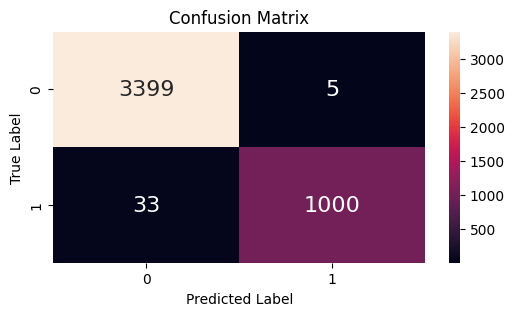

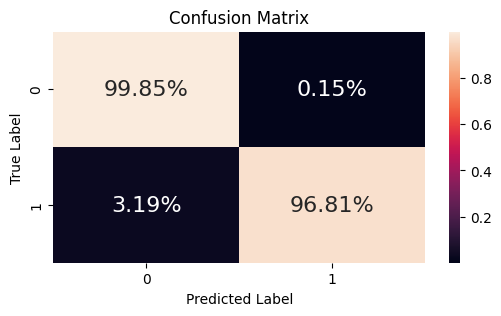

TEST SET METRICS
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1434
           1       1.00      0.97      0.99       468

    accuracy                           0.99      1902
   macro avg       1.00      0.99      0.99      1902
weighted avg       0.99      0.99      0.99      1902



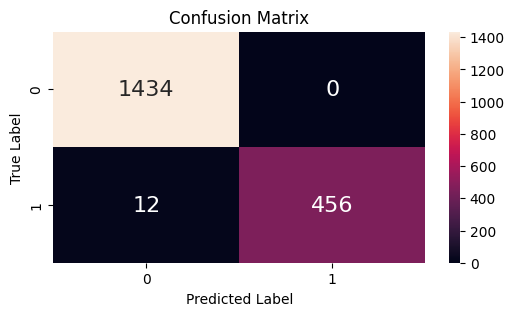

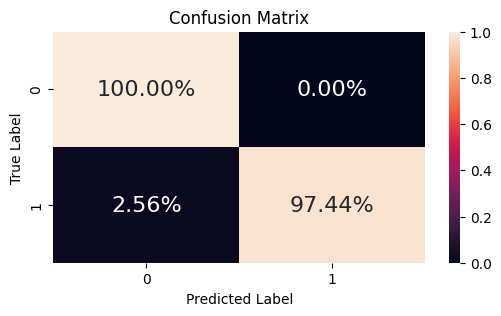

ALL METRICS
--------------------------------------------------------------


accuracy  precision    recall  f1-score model_name
train  0.991436   0.992705  0.983293  0.987898  log_reg_1
test   0.993691   0.995851  0.987179  0.991423  log_reg_1

In [57]:
results_1 = evaluate_classification_model(log_reg, X_train_mm, y_train, X_test_mm, y_test, 'log_reg_1')
results_1

In [59]:
y_test_results = y_test.copy()

In [61]:
y_test_results['predicted']= y_pred

In [79]:
y_pred_probab = log_reg.predict_proba(X_test)
y_test_results['probab'] = y_pred_probab[:,1]
y_test_results.head(5)

Quality  predicted        probab
4878        1          1  1.000000e+00
4960        1          1  1.000000e+00
2787        0          0  0.000000e+00
2751        0          0  0.000000e+00
5387        1          1  2.419044e-30

In [80]:
y_test_results['probab'].describe().T

count     1.902000e+03
mean      1.929588e-01
std       3.947196e-01
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%      3.003360e-302
max       1.000000e+00
Name: probab, dtype: float64

In [118]:
y_test_results['probab'] = y_test_results['probab'].round(5)

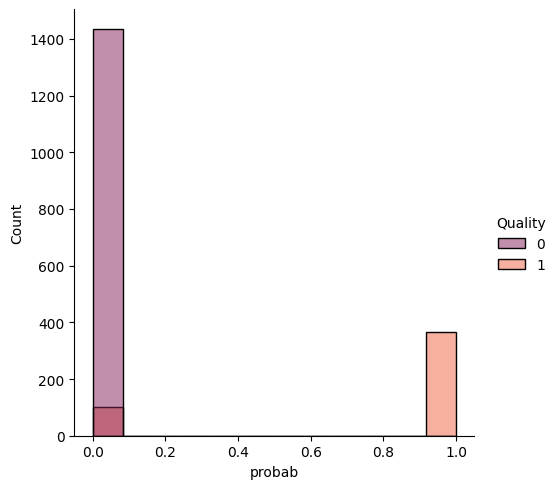

In [119]:
sns.displot(data=y_test_results, x='probab', hue='Quality', palette='rocket')
plt.show()

<b>Hyperparameter tuning Log Regression

In [82]:
from sklearn.model_selection import GridSearchCV  ##RandomSearch is an alternative

penalty = ['l1', 'l2'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

In [83]:
param_grid = dict(penalty=penalty, C=C, 
                  solver=solver)

grid = GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid, 
                    scoring='roc_auc',
                    verbose=1, n_jobs=-1, cv=10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc', verbose=1)

In [84]:
%%time
grid_result = grid.fit(X_train_mm, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConve

CPU times: user 1.04 s, sys: 408 ms, total: 1.45 s
Wall time: 24.1 s


In [85]:
tuned_log_reg = grid_result.best_estimator_
tuned_log_reg

LogisticRegression(C=100, penalty='l1', solver='saga')

TRAINING SET METRICS
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3404
           1       1.00      0.99      1.00      1033

    accuracy                           1.00      4437
   macro avg       1.00      1.00      1.00      4437
weighted avg       1.00      1.00      1.00      4437



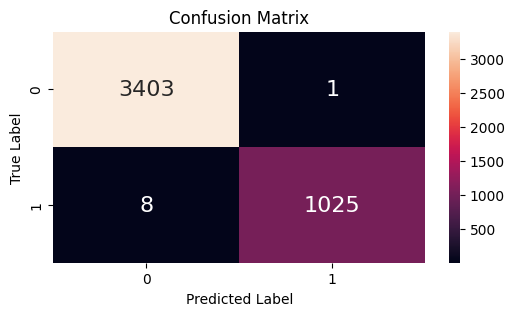

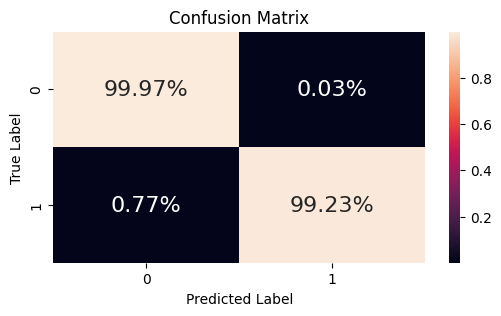

TEST SET METRICS
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1434
           1       1.00      0.99      1.00       468

    accuracy                           1.00      1902
   macro avg       1.00      1.00      1.00      1902
weighted avg       1.00      1.00      1.00      1902



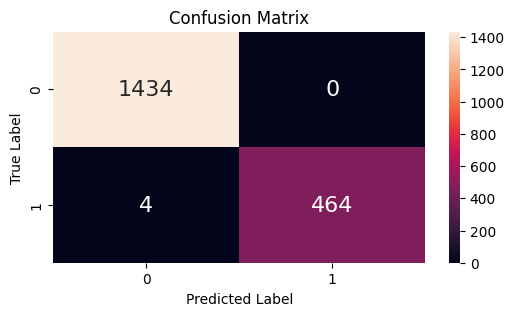

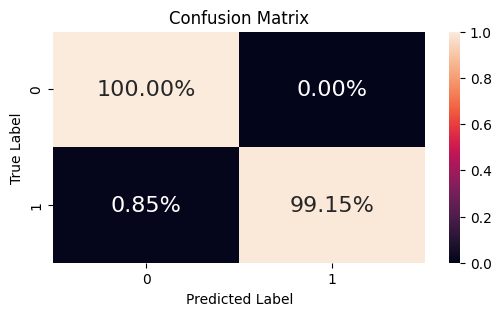

ALL METRICS
--------------------------------------------------------------


accuracy  precision    recall  f1-score model_name
train  0.997972   0.998340  0.995981  0.997154  log_reg_2
test   0.997897   0.998609  0.995726  0.997158  log_reg_2

/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConve

/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConve

/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConve

/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConve

/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lina/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConve

In [86]:
results_2 = evaluate_classification_model(tuned_log_reg, X_train_mm, y_train, X_test_mm, y_test, 'log_reg_2')
results_2

<b>Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 7)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

TRAINING SET METRICS
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3404
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      4437
   macro avg       1.00      1.00      1.00      4437
weighted avg       1.00      1.00      1.00      4437



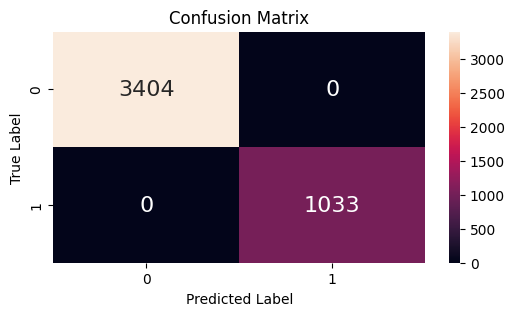

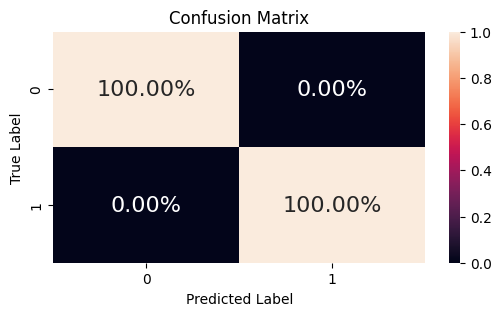

TEST SET METRICS
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1434
           1       1.00      0.99      1.00       468

    accuracy                           1.00      1902
   macro avg       1.00      1.00      1.00      1902
weighted avg       1.00      1.00      1.00      1902



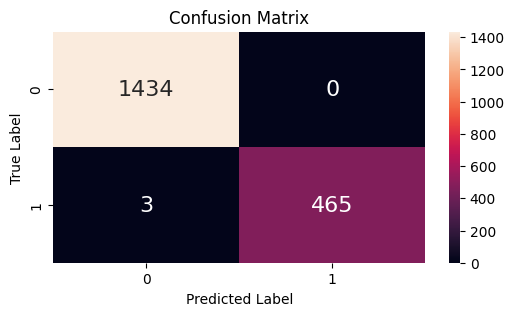

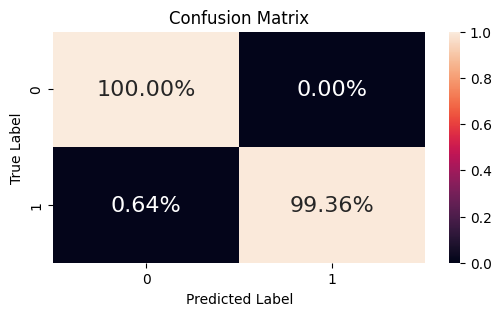

ALL METRICS
--------------------------------------------------------------


accuracy  precision    recall  f1-score model_name
train  1.000000   1.000000  1.000000   1.00000      tree1
test   0.998423   0.998956  0.996795   0.99787      tree1

In [89]:
results_3 = evaluate_classification_model(dtc, X_train, y_train, X_test, y_test, 'tree1')
results_3

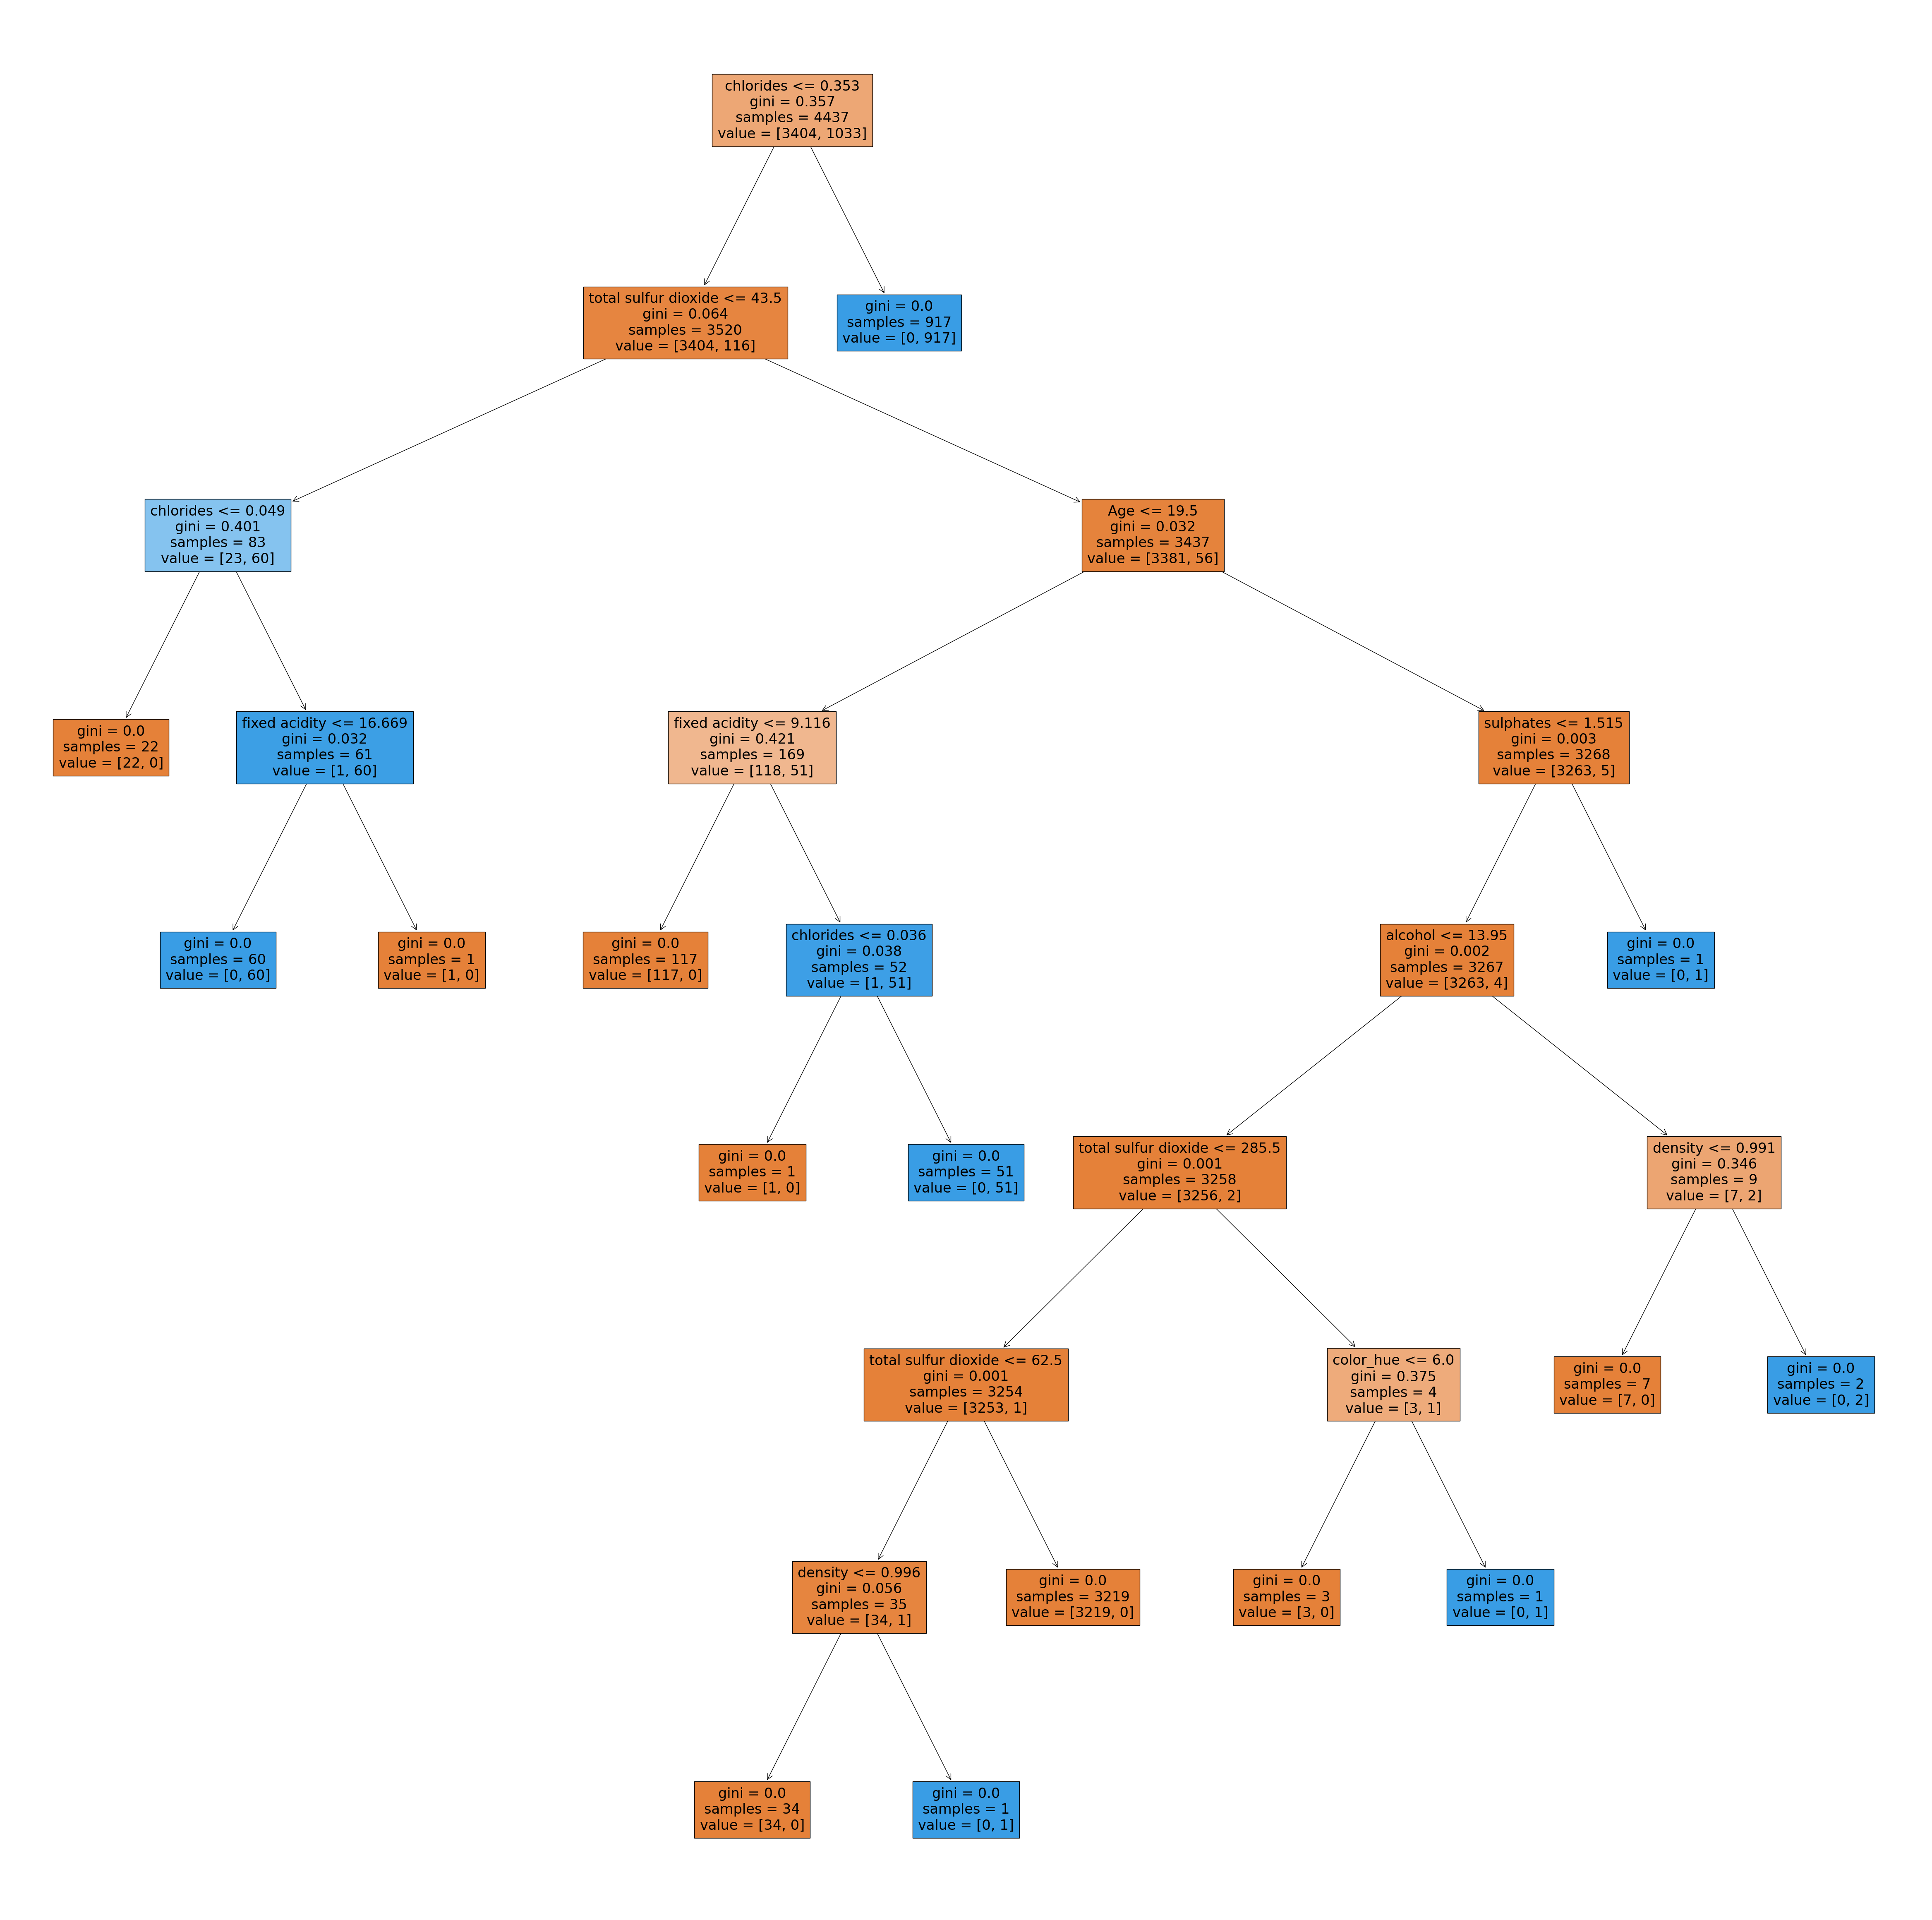

In [90]:
from sklearn import tree
fig = plt.figure(figsize=(60,60))
tree.plot_tree(dtc, feature_names = X_train.columns, filled=True);
fig.savefig("decision_tree_wine.png")

In [106]:
dtc.feature_importances_

array([4.49365408e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.79427955e-01, 0.00000000e+00, 5.14074750e-02, 3.18861489e-03,
       0.00000000e+00, 1.25835309e-03, 5.56181125e-04, 9.46369683e-04,
       1.82785107e-02])

<AxesSubplot:>

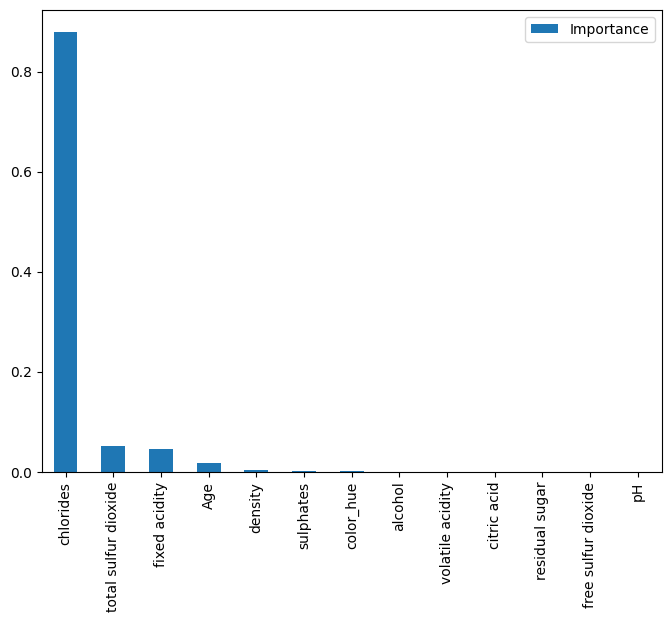

In [114]:
feat_importances = pd.DataFrame(dtc.feature_importances_,index = X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

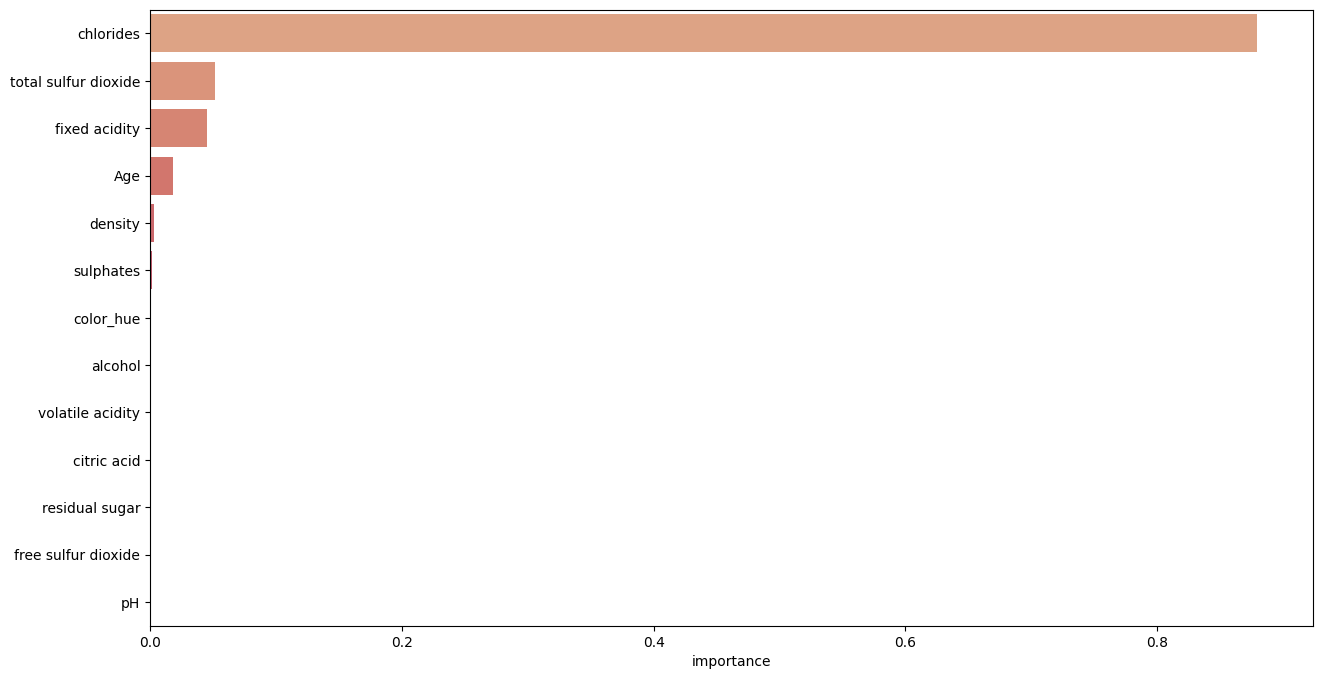

In [115]:
_= plot_feat_importance(dtc.feature_importances_, X_train.columns, figsize = (15,8))

In [92]:
param_grid_dt = {'min_samples_split' : range(10,400,20), 
             'max_depth': range(6,20,2)}

print(param_grid_dt)

{'min_samples_split': range(10, 400, 20), 'max_depth': range(6, 20, 2)}


In [95]:
dtc_2 = DecisionTreeClassifier(random_state=7)

In [96]:
%%time
dtc_tuned = GridSearchCV(dtc_2,
                   param_grid_dt,
                   scoring='roc_auc',
                   cv=5,
                   n_jobs=-1, verbose=1)

dtc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
CPU times: user 1.32 s, sys: 202 ms, total: 1.52 s
Wall time: 6.73 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid={'max_depth': range(6, 20, 2),
                         'min_samples_split': range(10, 400, 20)},
             scoring='roc_auc', verbose=1)

In [97]:
dtc_tuned.best_params_

{'max_depth': 8, 'min_samples_split': 90}

TRAINING SET METRICS
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3404
           1       0.98      1.00      0.99      1033

    accuracy                           0.99      4437
   macro avg       0.99      0.99      0.99      4437
weighted avg       0.99      0.99      0.99      4437



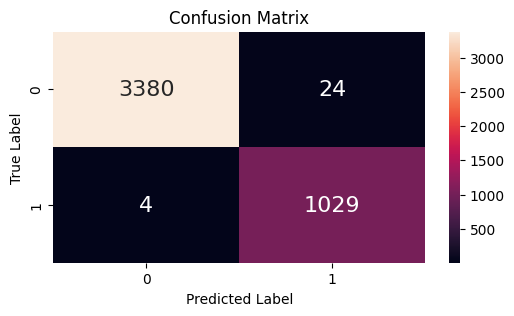

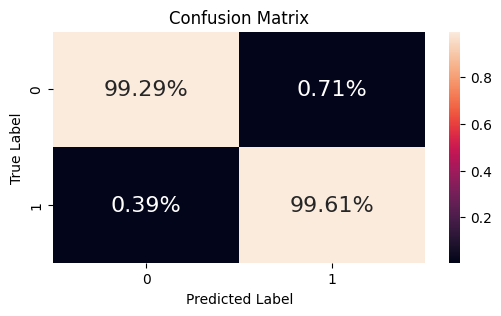

TEST SET METRICS
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1434
           1       0.98      0.99      0.99       468

    accuracy                           0.99      1902
   macro avg       0.99      0.99      0.99      1902
weighted avg       0.99      0.99      0.99      1902



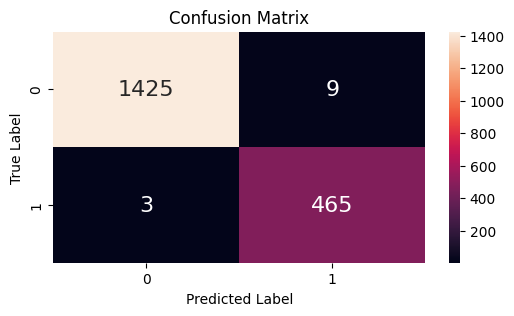

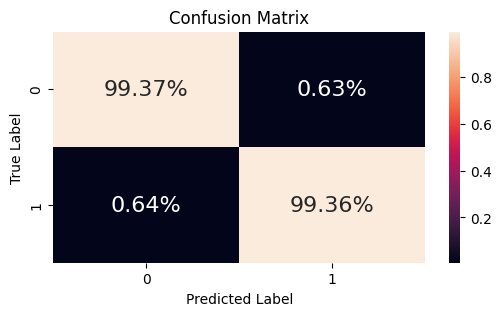

ALL METRICS
--------------------------------------------------------------


accuracy  precision    recall  f1-score model_name
train  0.993689   0.988013  0.994539  0.991226      tree2
test   0.993691   0.989456  0.993657  0.991534      tree2

In [98]:
results_4 = evaluate_classification_model(dtc_tuned.best_estimator_, X_train, y_train, X_test, y_test, 'tree2')
results_4

In [99]:
all_res = pd.concat([results_1, results_2, results_3, results_4])
all_res = all_res.reset_index()
all_res = all_res.rename(columns={'index': 'dataset'})
all_res

dataset  accuracy  precision    recall  f1-score model_name
0   train  0.991436   0.992705  0.983293  0.987898  log_reg_1
1    test  0.993691   0.995851  0.987179  0.991423  log_reg_1
2   train  0.997972   0.998340  0.995981  0.997154  log_reg_2
3    test  0.997897   0.998609  0.995726  0.997158  log_reg_2
4   train  1.000000   1.000000  1.000000  1.000000      tree1
5    test  0.998423   0.998956  0.996795  0.997870      tree1
6   train  0.993689   0.988013  0.994539  0.991226      tree2
7    test  0.993691   0.989456  0.993657  0.991534      tree2

In [101]:
#is there a way to get feature importance order in decision trees automatically?

In [102]:
#try changing data balance?